# Bank Stock Analysis

We'll focus on bank stocks and see how they progressed in the past 20 years

pip install yfinanace<br>
pip install pandas_datareader

*Lets import all the required libraries*

In [164]:
from pandas_datareader import data as pdr # datareader to read data from yahoo finance API
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

### Data

We will import data of stocks information of these 5 stocks:

*  State Bank of India
* HDFC Bank
* ICICI Bank
* Punjab National Bank
* Induslnd Bank

In [3]:
start = dt.datetime(2005,1,1)
print(start)

2005-01-01 00:00:00


In [4]:
end = dt.datetime.now()
print(end)

2024-05-19 07:15:06.152890


In [5]:
yf.pdr_override()

In [6]:
tickers = ['SBI','HDFC','ICICI','PNB','KMB']

In [7]:
#State Bank of India
SBI = pdr.get_data_yahoo("SBIN.NS", start, end)

#HDFC
HDFC = pdr.get_data_yahoo("HDFCBANK.NS",start,end)

#ICICI
ICICI = pdr.get_data_yahoo("ICICIBANK.NS",start,end)

#Punjab National Bank
PNB = pdr.get_data_yahoo("PNB.NS",start,end)

#Kotak Mahindra Bank
KMB = pdr.get_data_yahoo("KOTAKBANK.NS",start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Arranging data in multi-level indexed dataframe

In [8]:
bank_stocks = pd.concat([SBI,HDFC,ICICI,PNB,KMB],axis=1,keys=tickers)

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        SBI                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2005-01-03   61.753441  62.545998  61.338287  61.871380  48.866093  22590407   
2005-01-04   62.163872  62.168587  60.965599  61.319420  48.430161  26206416   
2005-01-05   61.324139  61.876095  55.762081  58.257694  46.011997  52142335   
2005-01-06   58.050117  59.338024  56.247993  57.016964  45.032070  47719200   
2005-01-07   57.498161  58.493572  57.106598  58.087860  45.877865  30985674   

Bank Ticker       HDFC                                   ...        PNB  \
Stock Info        Open       High        Low      Close  ...        Low   
Date                                                     ...              
2005-01-03   51.605000  52.779999  51.605000  52.525002  ...  81.000000   
2005-01-04   52.505001  53.099998  50.500000  51.945000  ...  83.110001   
2005-01-05   52.000000  52.000000  48.700001  50.005001  ...  80.199997   
2005-01-06   50.005001  50.980000  47.900002  48.514999  ...  80.709999   
2005-01-07   48.799999  49.375000  48.450001  49.025002  ...  78.540001   

Bank Ticker                                        KMB                        \
Stock Info       Close  Adj Close    Volume       Open       High        Low   
Date                                                                           
2005-01-03   83.809998  61.972977   5412820  29.000000  29.100000  28.000000   
2005-01-04   86.980003  64.317032  12291095  29.000000  30.400000  28.200001   
2005-01-05   84.669998  62.608898  11409410  29.799999  30.200001  27.900000   
2005-01-06   82.849998  61.263107  11366290  28.900000  28.900000  26.299999   
2005-01-07   80.540001  59.555000  16589205  29.000000  29.150000  28.100000   

Bank Ticker                                 
Stock Info       Close  Adj Close   Volume  
Date                                        
2005-01-03   28.705000  28.154261   761120  
2005-01-04   29.750000  29.179207   745130  
2005-01-05   28.900000  28.345520   736430  
2005-01-06   28.094999  27.555962  1027790  
2005-01-07   28.410000  27.864922   226710  

[5 rows x 30 columns]

## EDA

Highest Closing Price:

In [12]:
bank_stocks.xs('Close',axis=1,level = 'Stock Info',drop_level=True).max()

Bank Ticker
SBI       831.450012
HDFC     1728.199951
ICICI    1160.150024
PNB       277.079987
KMB      2210.949951
dtype: float64

Date of Highest Closing Price:

In [13]:
bank_stocks.xs('Close',axis=1,level = 'Stock Info',drop_level=True).idxmax()

Bank Ticker
SBI     2024-05-03
HDFC    2023-07-04
ICICI   2024-04-29
PNB     2010-11-09
KMB     2021-10-26
dtype: datetime64[ns]

Lowest Closing Price:

In [14]:
bank_stocks.xs('Close',axis=1,level = 'Stock Info',drop_level=True).min()

Bank Ticker
SBI      53.893909
HDFC     48.095001
ICICI    47.809093
PNB      26.600000
KMB      26.055000
dtype: float64

Date of Highest Closing Price:

In [15]:
bank_stocks.xs('Close',axis=1,level = 'Stock Info',drop_level=True).idxmin()

Bank Ticker
SBI     2005-01-24
HDFC    2005-01-12
ICICI   2009-03-09
PNB     2020-05-19
KMB     2005-01-25
dtype: datetime64[ns]

#### Dataframe to store returns of each stock

In [16]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [17]:
returns = returns[1:]

In [18]:
returns.head()

,SBI Return,HDFC Return,ICICI Return,PNB Return,KMB Return
Date,,,,,
2005-01-04,-0.008921,-0.011042,0.006867,0.037824,0.036405
2005-01-05,-0.049931,-0.037347,-0.032495,-0.026558,-0.028571
2005-01-06,-0.021297,-0.029797,-0.023082,-0.021495,-0.027855
2005-01-07,0.018782,0.010512,0.014997,-0.027882,0.011212
2005-01-10,-0.025501,-0.001020,-0.027321,-0.053886,0.004928


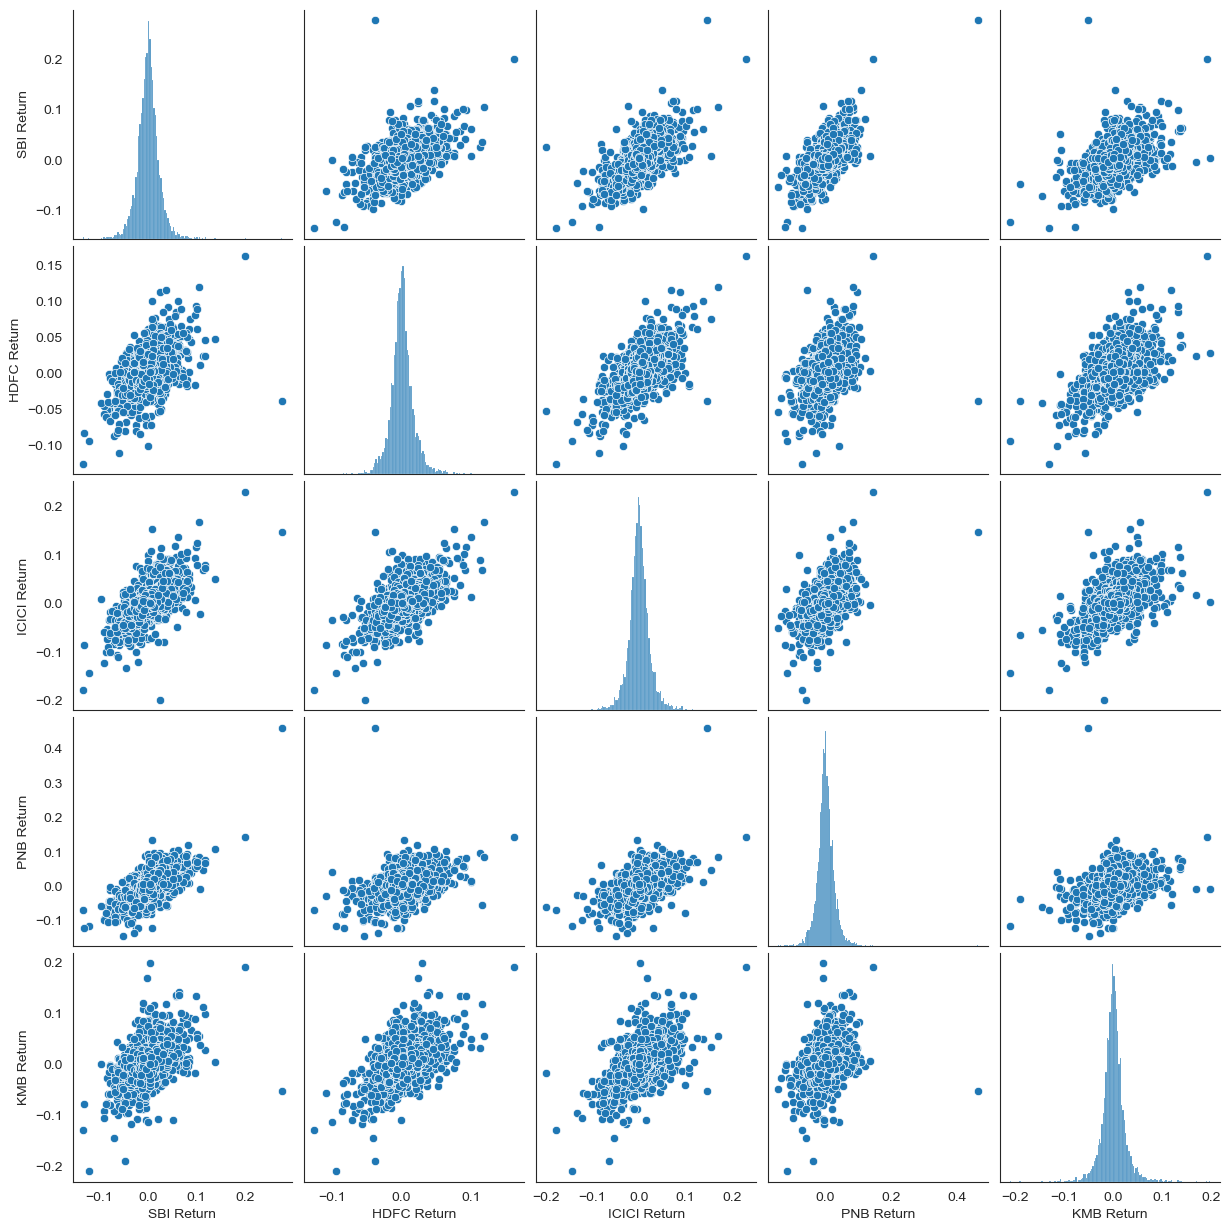

In [19]:
sns.pairplot(returns)

#### Best Single Day Returns

In [20]:
returns.idxmax()

SBI Return     2017-10-25
HDFC Return    2009-05-18
ICICI Return   2009-05-18
PNB Return     2017-10-25
KMB Return     2006-06-09
dtype: datetime64[ns]

In [21]:
returns.max()

SBI Return      0.276872
HDFC Return     0.163003
ICICI Return    0.230381
PNB Return      0.462012
KMB Return      0.198284
dtype: float64

SBI, PNB have the best single day return on Oct, 2017 because of [SBI's Merger](https://economictimes.indiatimes.com/industry/banking/finance/banking/sbi-to-become-a-single-entity-by-april-2017-with-its-subsidiaries/articleshow/53533284.cms?from=mdr)<br>
And, ICICI and Kotak Mahindra Bank has the best single day retuns on May, 2009 because of [click here](https://economictimes.indiatimes.com/19-indian-banks-in-top-500-global-financial-brands-2009/articleshow/4064840.cms?from=mdr)

#### Worst Single Day Returns

In [22]:
returns.idxmin()

SBI Return     2020-03-23
HDFC Return    2020-03-23
ICICI Return   2008-10-10
PNB Return     2022-02-24
KMB Return     2008-10-24
dtype: datetime64[ns]

In [23]:
returns.min()

SBI Return     -0.134620
HDFC Return    -0.126069
ICICI Return   -0.198568
PNB Return     -0.143240
KMB Return     -0.210421
dtype: float64

SBI, HDFC have the worst single day return on March, 2020 because [stock market crasis due to covid-19](https://www.sciencedirect.com/science/article/pii/S1544612320306668)<br>
And, ICICI and Kotak Mahindra Bank has the worst single day retuns on Oct, 2008 because of [Global Financial Crisis, 2008](https://en.wikipedia.org/wiki/Global_financial_crisis_in_October_2008)

#### Let's check which stock was the riskiest overtime

In [24]:
returns.std()

SBI Return      0.022731
HDFC Return     0.018180
ICICI Return    0.024411
PNB Return      0.026221
KMB Return      0.024079
dtype: float64

*All Stocks have a similar risk profile*

### <font color='green'>Banking Sector duirng covid (2020-21)</font>


In [25]:
returns.loc['2020-01-01':'2021-12-31'].std()

SBI Return      0.026208
HDFC Return     0.021207
ICICI Return    0.027496
PNB Return      0.028254
KMB Return      0.023766
dtype: float64

<Axes: xlabel='SBI Return', ylabel='Count'>

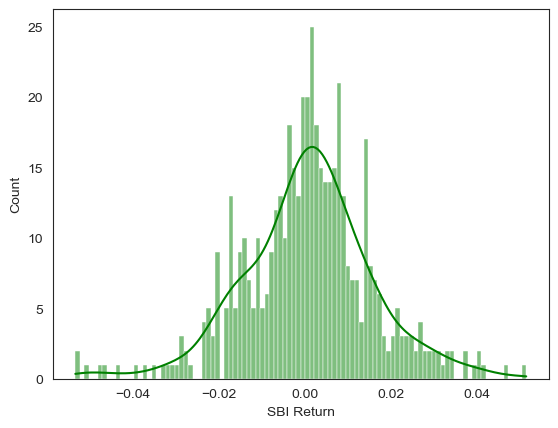

In [26]:
sns.histplot(returns['SBI Return'].loc['2022-01-01':'2023-12-31'],color='green',bins=100,kde=True)

Let's Compare returns of banking v/s other industry during covid-19

In [27]:
ONGC = pdr.get_data_yahoo("ONGC.NS", start, end)


[*********************100%%**********************]  1 of 1 completed


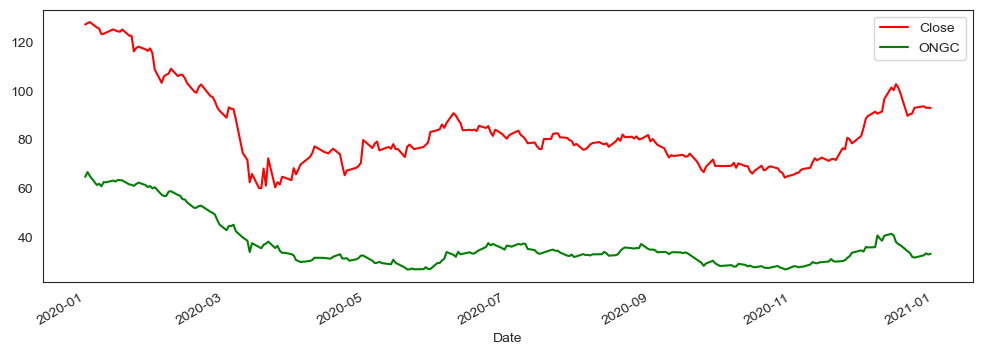

In [32]:
ONGC['Close'].loc['2020-01-01':'2020-12-31'].plot(figsize=(12,4),color = 'red')
bank_stocks.xs('Close',level = 'Stock Info',axis=1)['PNB'].loc['2020-01-01':'2020-12-31'].plot(figsize=(12,4),color='green',label='ONGC')
plt.legend()

### <font color='green'>Let's Check in year 2022-23</font>

In [29]:
returns.loc['2022-01-01':'2023-12-31'].std()

SBI Return      0.015050
HDFC Return     0.013742
ICICI Return    0.012414
PNB Return      0.023727
KMB Return      0.013458
dtype: float64

<Axes: xlabel='HDFC Return', ylabel='Count'>

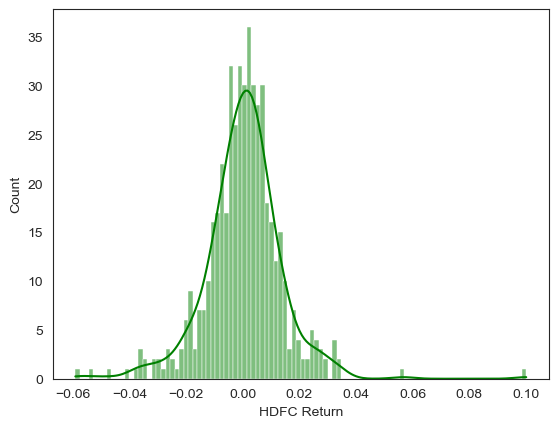

In [30]:
sns.histplot(returns['HDFC Return'].loc['2022-01-01':'2023-12-31'],color='green',bins=100,kde=True)

<Axes: xlabel='PNB Return', ylabel='Count'>

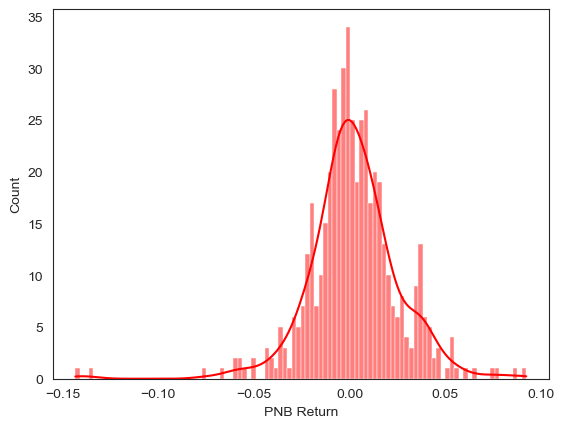

In [31]:
sns.histplot(returns['PNB Return'].loc['2022-01-01':'2023-12-31'],color='red',bins=100,kde=True,)

### <font color='green'>Stocks performance before 2020</font>

*Kotak and HDFC Bank showed high growth after 2012*

In year 2014, [Private Banks showed outshined PSBs in term of profits](https://www.thehindubusinessline.com/money-and-banking/private-banks-outshine-psbs-in-profit-share-in-2014-15/article64350077.ece)

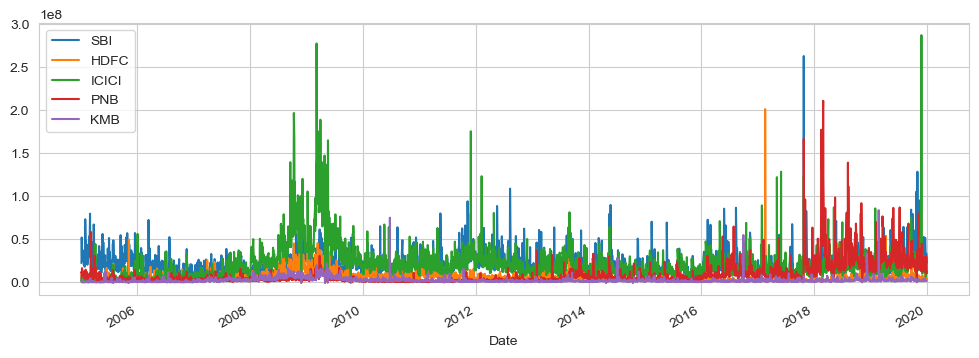

In [80]:
bank_stocks.xs('Volume',level = 'Stock Info',axis=1).loc[start:'2019-12-31'].plot(figsize=(12,4))
plt.legend()

#### <font color='teal'>Relation Between these stocks</font>

In [35]:
bank_stocks.xs('Close',level = 'Stock Info',axis=1).corr()

Bank Ticker,SBI,HDFC,ICICI,PNB,KMB
Bank Ticker,,,,,
SBI,1.000000,0.843734,0.948432,-0.197298,0.820391
HDFC,0.843734,1.000000,0.911484,-0.549608,0.993746
ICICI,0.948432,0.911484,1.000000,-0.454036,0.895840
PNB,-0.197298,-0.549608,-0.454036,1.000000,-0.572626
KMB,0.820391,0.993746,0.895840,-0.572626,1.000000


<Axes: >

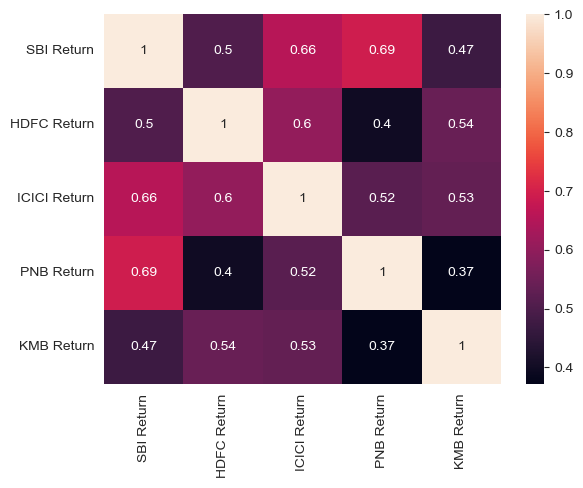

In [41]:
corr = returns.corr()
sns.heatmap(corr,annot = True)

### Private v/s Public Bank

*HDFC*

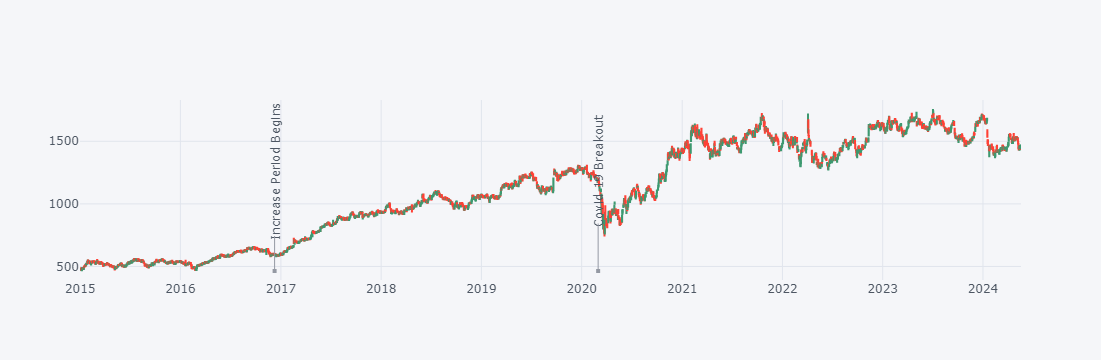

In [59]:
bank_stocks['HDFC'].loc['2015-01-01':].iplot(kind='candle',
                                             annotations=[dict(
        x='2016-12-09', y=0.05, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='Increase Period Begins'),
                                                         dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='Covid 19 Breakout')])

*SBI*

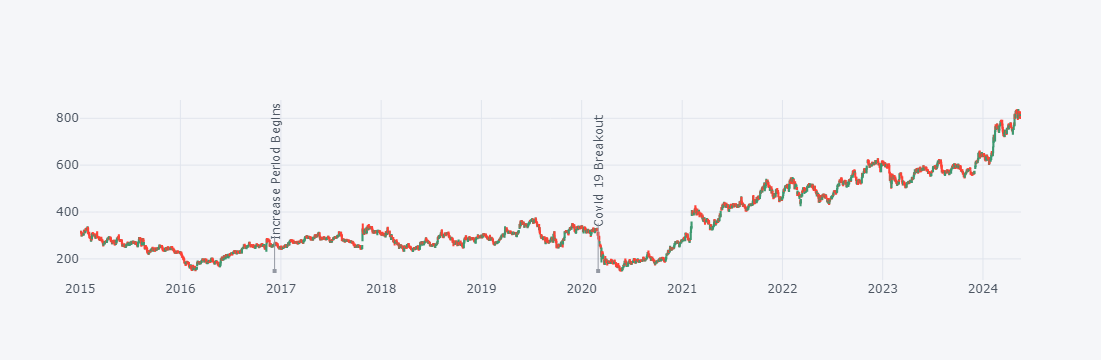

In [58]:
bank_stocks['SBI'].loc['2015-01-01':].iplot(kind='candle',
                                           annotations=[dict(
        x='2016-12-09', y=0.05, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='Increase Period Begins'),
                                                         dict(
        x='2020-03-01', y=0.05, xref='x', yref='paper',
        showarrow=True, xanchor='left', text='Covid 19 Breakout')])

### Stock Volume 

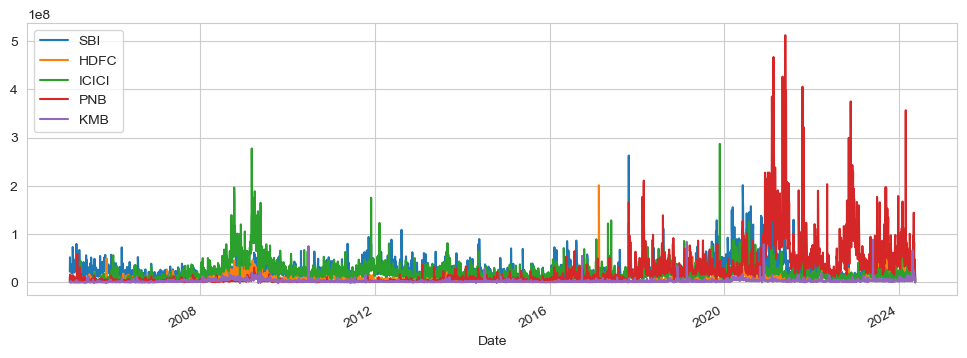

In [83]:
bank_stocks.xs('Volume',level = 'Stock Info',axis=1).plot(figsize=(12,4))
plt.legend()

PNB has increasing volumne after 2020 [i](https://www.business-standard.com/markets/capital-market-news/volumes-jump-at-pnb-housing-finance-ltd-counter-124040100495_1.html)

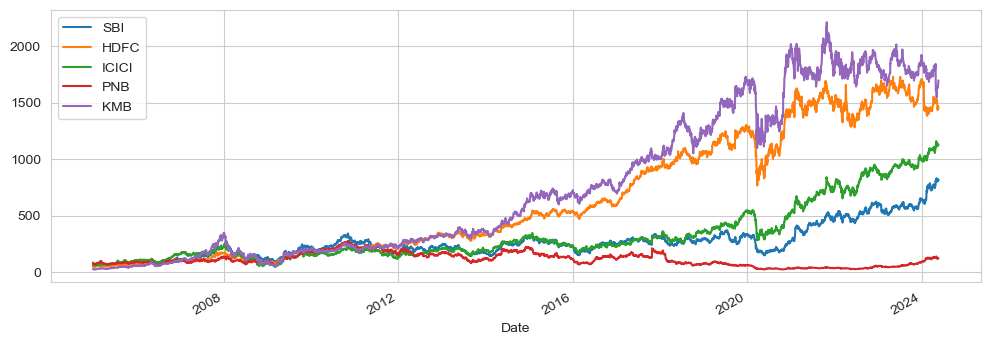

In [85]:
bank_stocks.xs('Close',level = 'Stock Info',axis=1).plot(figsize=(12,4))
plt.legend()

Private banks like HDFC and KMB stock prices increases rapidy after 2013

### Let's Compare returns of these bank stocks

In [156]:
stock_price = bank_stocks.xs('Close',level = 'Stock Info',axis=1)

In [168]:
periods_days = {
    '1 Week': 7,
    '1 Month': 30,
    '3 Months': 90,
    '6 Months': 180,
    '1 Year': 365,
    '3 Years': 3 * 365,
    '5 Years': 5 * 365,
    '10 Years': 10 * 365,
    '15 Years': 15 * 365
}

In [169]:
def calculate_returns(df, periods):
    returns = {}
    last_date = df.index[-1]
    
    for period,day in periods.items():
        period_date = last_date - dt.timedelta(days=day)
        if period_date in df.index:
            returns[period] = ((df.loc[last_date] / df.loc[period_date]) - 1) * 100
        else:
            # If the exact date doesn't exist, find the closest earlier date
            valid_dates = df.index[df.index <= period_date]
            if not valid_dates.empty:
                closest_date = valid_dates[-1]
                returns[period] = ((df.loc[last_date] / df.loc[closest_date]) - 1) * 100
            else:
                returns[period] = np.nan  # No valid data for this period
    
    return returns

returns_data = {}
for stock in stock_price.columns:
    # Convert dictionary values to list of integers to ensure correct timedelta usage
    returns_data[stock] = calculate_returns(stock_price[stock], periods_days)


In [170]:
print(returns_data)

{'SBI': {'1 Week': 0.446568119298707, '1 Month': 10.230936285704196, '3 Months': 8.784945901760643, '6 Months': 45.631929046563194, '1 Year': 42.745364713562985, '3 Years': 113.5796079697879, '5 Years': 138.1781174718662, '10 Years': 233.83484099166188, '15 Years': 374.0184841027114}, 'HDFC': {'1 Week': 1.9577177784341204, '1 Month': -1.916766125621927, '3 Months': 3.2502305528945064, '6 Months': -2.600976854488324, '1 Year': -10.981235831257008, '3 Years': 0.5383416485469805, '5 Years': 20.545973233110892, '10 Years': 262.2112535708771, '15 Years': 970.2266980296963}, 'ICICI': {'1 Week': 1.2264402285508513, '1 Month': 7.134402606634138, '3 Months': 10.50574150989494, '6 Months': 22.714198819278252, '1 Year': 18.489994180458, '3 Years': 80.78982779293776, '5 Years': 177.34853228942308, '10 Years': 331.71878704834876, '15 Years': 785.095697568785}, 'PNB': {'1 Week': 1.775623019490169, '1 Month': -2.6630679246363087, '3 Months': -3.1117907124793787, '6 Months': 60.841831657996835, '1 Yea

In [171]:
returns_df = pd.DataFrame.from_dict(returns_data, orient='index')

returns_df.head()

,1 Week,1 Month,3 Months,6 Months,1 Year,3 Years,5 Years,10 Years,15 Years
SBI,0.446568,10.230936,8.784946,45.631929,42.745365,113.579608,138.178117,233.834841,374.018484
HDFC,1.957718,-1.916766,3.250231,-2.600977,-10.981236,0.538342,20.545973,262.211254,970.226698
ICICI,1.226440,7.134403,10.505742,22.714199,18.489994,80.789828,177.348532,331.718787,785.095698
PNB,1.775623,-2.663068,-3.111791,60.841832,156.040606,248.342530,42.727788,-36.083936,-4.923476
KMB,4.238460,-5.025888,-2.207178,-4.156906,-12.602687,-1.941585,12.937998,278.508873,953.842581


*Above table compares the result of stock with each other, [You can also compare the accuracy](https://www.topstockresearch.com/rt/Stock/PNB/BirdsEyeView)*

The highest returns of 
*  958% is yielded by **Kotak Mahindra Bank** in a span of past 15 years
*  331% is yielded by **ICICI Bank** in a span of past 10 Years
*  248% is yielded by **Punjab National Bank** in a span of past 3 Years
*  156% is yielded by **Punjab National Bank** in a span of past 1 Year